# Visualization of colour segmentation - not used in final version

In [1]:
import cv2
import numpy as np
import shutil
import requests
import matplotlib.pyplot as plt # for plotting

In [2]:
#image was taken from https://www.freepik.com/ as free sample
url = 'https://img.freepik.com/free-photo/black-t-shirts-with-copy-space_53876-102012.jpg?w=1380&t=st=1682023838~exp=1682024438~hmac=848cf81643322e07c0f26cd0e87b46587e7fc739555d9f4942c59d16a100dd10'
response = requests.get(url, stream=True)
with open('img.png', 'wb') as out_file:
    shutil.copyfileobj(response.raw, out_file)
del response
img = cv2.imread('img.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)


(920, 1380, 3)


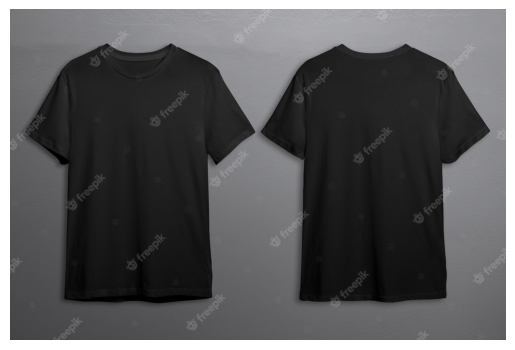

In [3]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [4]:
colours = np.array([
    [0,0,0],
    [128,0,0],
    [0,128,0],
    [0,0,128],
    [0,128,128],
    [128,0,128],
    [128,128,0],
    [128,128,128],
    [255,0,0],
    [0,255,0],
    [0,0,255],
    [0,255,255],
    [255,0,255],
    [255,255,0],    
    [255,255,255]]
)

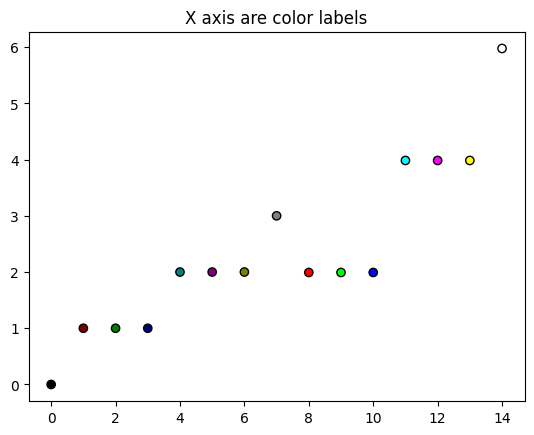

In [5]:
x=np.arange(len(colours))
y=np.sum(colours,axis=1)/128
plt.scatter(x=x,y=y,c=[tuple(c/255.0) for c in colours],edgecolors='black')
plt.title("X axis are color labels")
plt.show()

In [6]:
def color_sorting_fn(img,colors,kernel=None, return_visualization=False):
  output_color_counts = [0 for c in colors]
  #reshape img
  img_shape = img.shape
  img = np.reshape(img,(-1,3))

  dists = np.sum(img*img,axis=1)[:,None] + np.sum(colors*colors,axis=1)[None,:] - 2*(img @ colors.T)  
  closest_index = np.argmin(dists,axis=1)

  if kernel is None:    
    indexes, counts = np.unique(closest_index,return_counts=True)  
  elif kernel == "gauss":
    g_kernel = np.transpose(cv2.getGaussianKernel(img_shape[1],sigma=img_shape[1]/3)) * cv2.getGaussianKernel(img_shape[0],sigma=img_shape[0]/3)
    #for kernel visualizaiton purposes only, can be deleted
    plt.imshow(g_kernel)
    plt.colorbar()
    plt.show()
    #print("Sum of the gaussian kernel should be 1: ",np.sum(g_kernel))
    g_kernel = g_kernel*len(img)
    indexes = np.arange(len(colors))
    counts = np.bincount(closest_index,weights=g_kernel.reshape(-1))
  
  for i,c in zip(indexes,counts):
      output_color_counts[i]=c
  
  if return_visualization is True:
      return output_color_counts,colors[closest_index].reshape(img_shape)
  else:
    return output_color_counts



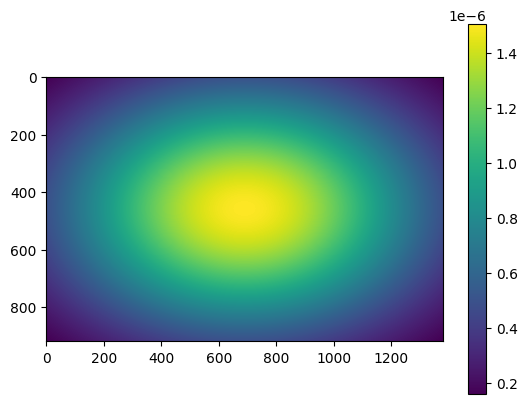

[740713.2517298876, 0.0, 0.0, 584.5115825126819, 3.14407068392536, 0.8437117169713068, 1.3413445504502075, 528256.4377853003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 40.469775414986245]


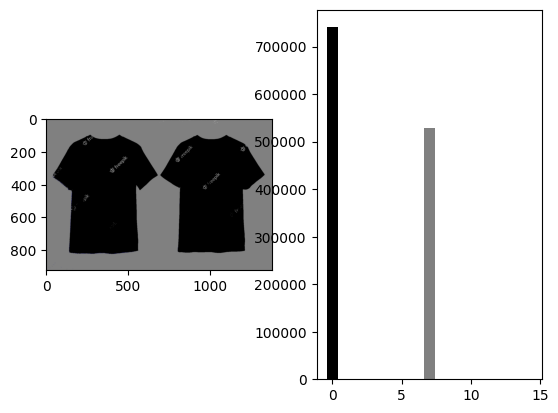

In [10]:
color_counts,img_coloured = color_sorting_fn(img,colours,kernel="gauss",return_visualization=True)
print(color_counts)
plt.subplot(121)
plt.imshow(img_coloured)
plt.subplot(122)
plt.bar(x,color_counts,color=colours/255.0)
plt.show()